# Benign and Malignant Breast Cancer Classification
### Group F - M. Caiola, L. Cusin, G. Serafini, A. Tonello - [GitHub repository](https://github.com/andrea-tonello/SM-project)

# Dataset Information

The data was recorded by the pathology and hematology departments at Libya's Sebha Oncology Center. The information was gathered from BC cases that were recorded at the center between 2015 and 2020, which represents the time limits of the study. The inclusion criteria were *all Libyan cases from different regions who were registered during the study at the SOC*.

Biomarkers and tumor markers are molecules used to detect the presence of cancer, monitor it, and evaluate its response to treatment. In the case of breast cancer, these markers could be proteins, genes, or their products that are found in abnormal levels in the body.

The role of biomarkers in diagnosing breast cancer are:

 1) Early detection: Vital signs help detect cancer in its early stages, which increases the chances of successful treatment.
 2) Diagnosis: Some vital signs can be used to determine the type of breast cancer and its stages of development.
 3) Treatment evaluation: It helps evaluate the effectiveness of the ongoing treatment and monitor the progression of the disease.

Biomarkers used to discover breast cancer are:

CA 15-3 and CEA: these are proteins found in elevated levels in some types of breast cancer, and are used to monitor treatment.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import statsmodels.api as sm

In [2]:
%%capture
%load_ext autoreload
%autoreload 2

import utils

In [3]:
file_path = './data/BC.csv'
data = pd.read_csv(file_path)
data = data.rename(columns={'Adress': 'Address'})

pd.set_option("display.max_columns", None)
data.head()

,Sex,Age,Address,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,100,23,0.8,3.4,10.0,20,10,124,17.18,3.87,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,0
1,1,53,Sabha,190,27,0.6,4.2,9.3,11,17,133,13.00,0.12,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,0
2,1,50,Sabha,150,15,1.1,3.5,8.5,13,10,155,14.50,1.18,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,0
3,1,36,Obaree-center,80,20,1.0,4.2,8.0,7,13,170,20.13,3.12,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,0
4,1,30,Obaree-center,80,40,0.8,3.0,9.5,9,15,125,13.25,1.25,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,0


This is a brief description of the variables:

1. **Sex**: Biological sex of the individual (e.g., 1 = Male, 2 = Female)

2. **Age**: Age of the individual in years
3. **Address**: Location or residence of the individual (likely categorical)
4. **FBS**: Fasting Blood Sugar (mg/dL), a measure of blood glucose after fasting.
5. **Urea**: Blood urea level (mg/dL), a measure of kidney function.
6. **Creatinin**: Serum creatinine level (mg/dL), a marker for kidney function.
7. **ALB**: Albumin (g/dL), a protein in the blood, indicative of liver or kidney health.
8. **T_Ca**: Total Calcium (mg/dL), important for bone health and metabolic functions.
9. **GPT (ALT)**: Alanine Aminotransferase (U/L), a liver enzyme used to assess liver function.
10. **GOT (AST)**: Aspartate Aminotransferase (U/L), another liver enzyme indicative of liver health.
11. **ALP**: Alkaline Phosphatase (U/L), a liver and bone enzyme.
12. **CA15**: Cancer Antigen 15-3 (U/mL), often used as a tumor marker for breast cancer.
13. **CEA**: Carcinoembryonic Antigen (ng/mL), a marker for various cancers.
14. **WBC**: White Blood Cell count (×10³/µL), a measure of immune system activity.
15. **RBC**: Red Blood Cell count (×10⁶/µL), indicative of oxygen-carrying capacity.
16. **HGB**: Hemoglobin (g/dL), the oxygen-carrying protein in red blood cells.
17. **PLT**: Platelet count (×10³/µL), involved in blood clotting.
18. **ESR**: Erythrocyte Sedimentation Rate (mm/hour), a marker for inflammation.
19. **LDH**: Lactate Dehydrogenase (U/L), an enzyme linked to tissue damage.
20. **Na**: Sodium (mEq/L), an essential electrolyte.
21. **K**: Potassium (mEq/L), another critical electrolyte for muscle and heart function.
22. **CL**: Chloride (mEq/L), an electrolyte that helps maintain fluid balance.
23. **CLASS**: Response variable stating if the cancer if benign or malignant.

 The response variable is $\texttt{CLASS}$: $\quad$ 0 = Benign cancer, 1 = Malignant cancer

# Goal of our project
Provide a comprehensive analysis of the predictors for Benign or Malignant breast cancer, to establish whether the two biomarkers are enough to interpret the results. We explore the variables using various feature selection methods.

# Exploratory Data Analysis

First, we search for missing values. 

In [4]:
missing_values = data.isnull().sum().sum()
print(f"Total missing values: {missing_values}")

Total missing values: 0


The dataset shows no missing values. We can proceed with our dataset analysis by plotting the distribution of each numerical variable.

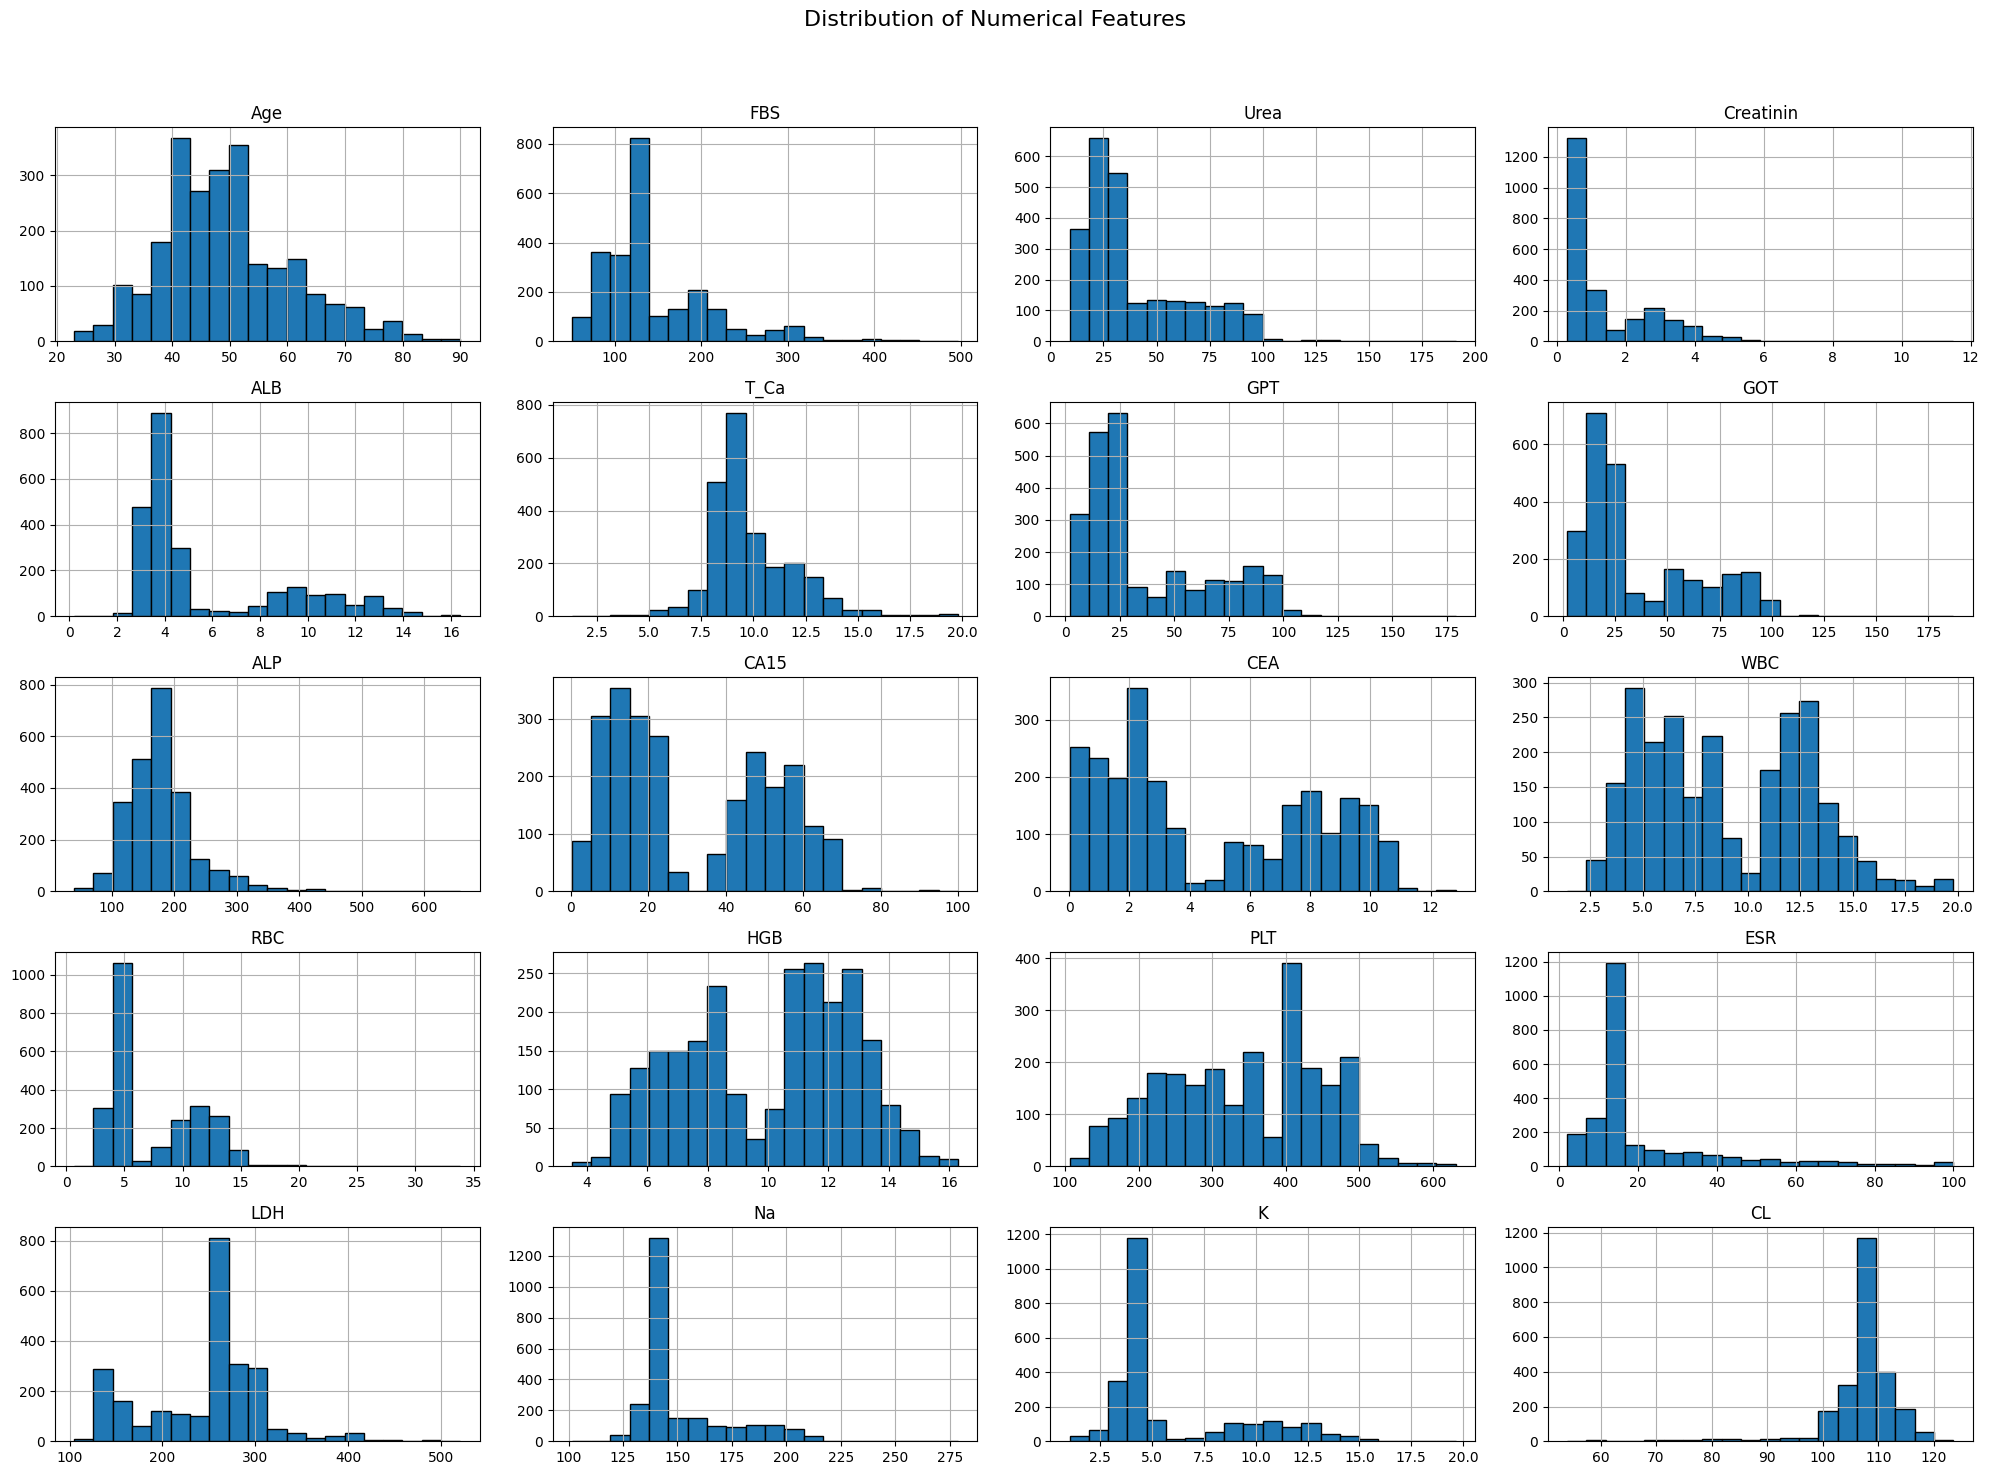

In [5]:
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.drop(['CLASS', 'Sex'])
data[numerical_features].hist(figsize=(20, 15), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Categorization of Variables by Type and Purpose

Categorizing the variables is essential for effectively organizing and interpreting the dataset, so we divided the variables into distinct groups (demographic, biochemical and clinical, and cancer-specific biomarkers) and this helped us identify relevant patterns, analyze significant correlations, and structure the analysis better for predicting the target variable. This segmentation also aided us in understanding the role of each variable in the medical and diagnostic context.


# Categorical Variables

Initially, we thought of using **Age** as a categorical variable, but after studying the correlation matrix, as we will see below, we decided to use it as a numerical variable because it showed no difference.

## *Address* 

Given the high number of sampled cities, we chose to categorize them into the three major Libian regions: Tripolitania, Cirenaica and Fezzan.

In [6]:
data['Address'].unique()

array(['Tragan', 'Sabha', 'Obaree-center', 'Alchate', 'Morzek',
       'Alzeegan', 'Algatroon', 'Godoha', 'Zoiwela', 'OmAlrianb',
       'Tripoli', 'Wade-atebah', 'Temaciha', 'Algofra', 'Gath',
       'Benwalid', 'Temcian', 'Alzwia-Algrbia', 'Magdool', 'BenGawoad',
       'Alagialt', 'Agdabia', 'GaberOan', 'Subrath', 'ALzentan',
       'Benghazi', 'Tegee', 'Graian', 'Zwoarha', 'sabha'], dtype=object)

In [7]:
Tripolitania = [
    'Tripoli', 'Benwalid', 'Subrath', 'ALzentan', 'Tegee', 'Graian', 
    'Zwoarha', 'Alagialt', 'Zoiwela'
]
Cirenaica = [
    'Benghazi', 'Agdabia', 'GaberOan', 'Alzwia-Algrbia', 'Magdool', 
    'BenGawoad', 'Alzeegan'
]
Fezzan = [
    'Sabha', 'sabha' ,'Tragan', 'Obaree-center', 'Alchate', 'Morzek', 'Algatroon', 
    'Godoha', 'OmAlrianb', 'Wade-atebah', 'Temaciha', 'Algofra', 'Gath', 'Temcian'
]

def classify_region_numeric(adress):
    if adress in Tripolitania:
        return 1  # Tripolitania
    elif adress in Cirenaica:
        return 2  # Cirenaica
    elif adress in Fezzan:
        return 3  # Fezzan

data['Address'] = data['Address'].apply(classify_region_numeric)

In [8]:
count_Tripolitania = len(data[(data['Address'] == 1)])
count_Cirenaica = len(data[(data['Address'] == 2)])
count_Fezzan = len(data[(data['Address'] == 3)])

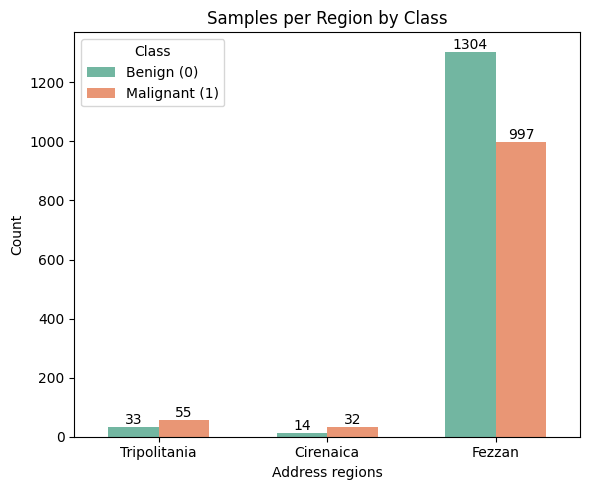

In [9]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=data, x='Address', hue='CLASS', palette='Set2', width=0.6)

for bar in ax.patches:
    if bar.get_height() > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            int(bar.get_height()),
            ha='center', va='bottom',
            fontsize=10
        )

custom_labels = ['Tripolitania', 'Cirenaica', 'Fezzan']
ax.set_xticks(range(len(custom_labels)))
ax.set_xticklabels(custom_labels)

plt.title('Samples per Region by Class')
plt.xlabel('Address regions')
plt.ylabel('Count')

plt.legend(title='Class', labels=['Benign (0)', 'Malignant (1)'], loc="upper left")
plt.tight_layout()

plt.show()


As an initial educated guess, Address will probably have a small impact on the predictions, since almost all individuals were sampled from the same region (Fezzan).

## *Sex*

We expect breast cancer to have a much larger impact on female individuals.

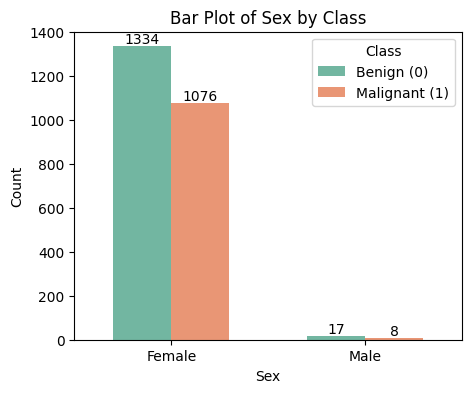

In [10]:
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=data, x='Sex', hue='CLASS', palette='Set2', width=0.6)

for bar in ax.patches:
    if bar.get_height() > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            int(bar.get_height()),
            ha='center', va='bottom',
            fontsize=10
        )

custom_labels = ['Female', 'Male']
ax.set_xticks(range(len(custom_labels)))
ax.set_xticklabels(custom_labels)

plt.title('Bar Plot of Sex by Class')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Benign (0)', 'Malignant (1)'])
plt.show()

Almost all sampled individuals are females. Again, we can deduce that the Sex variable won't have much impact on the predictions.

# Numerical Variables

## Biochemical and Clinical Variables
FBS - Urea - Creatinin - ALB - T_Ca - GPT (ALT) - GOT (AST) - ALP - WBC - RBC - HGB - PLT - ESR - LDH - Na - K - CL

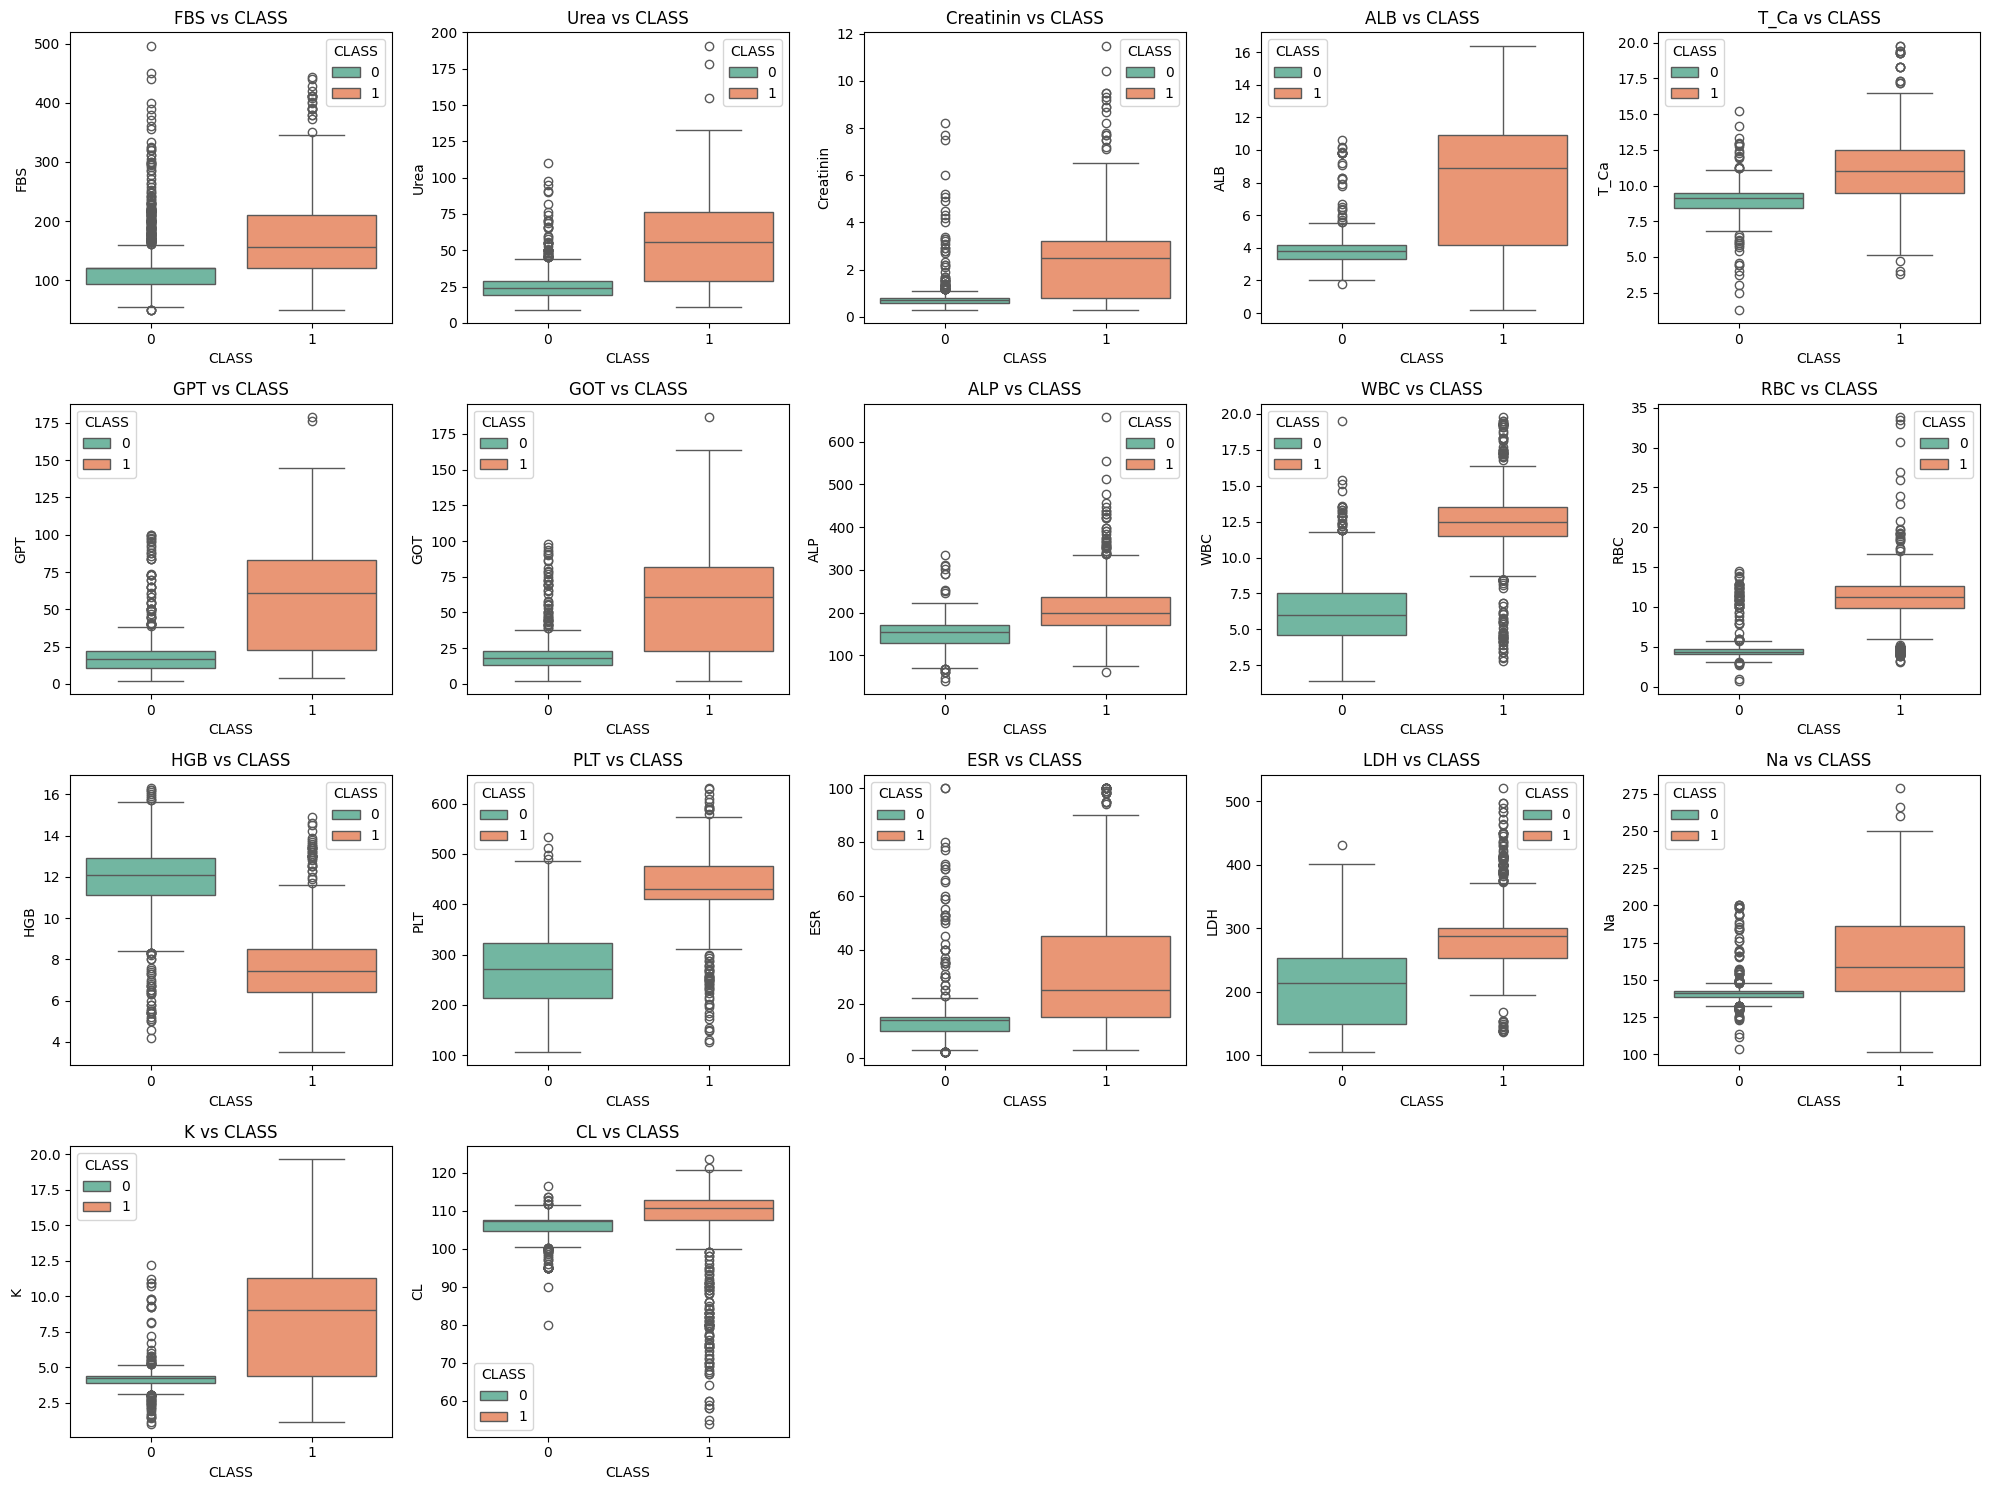

In [11]:
biochemical_clinical_vars = [
    'FBS', 'Urea', 'Creatinin', 'ALB', 'T_Ca', 'GPT', 'GOT', 'ALP',
    'WBC', 'RBC', 'HGB', 'PLT', 'ESR', 'LDH', 'Na', 'K', 'CL'
]

plt.figure(figsize=(20, 15))
for i, var in enumerate(biochemical_clinical_vars, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(data=data, x='CLASS', y=var, palette="Set2", hue='CLASS')
    plt.title(f'{var} vs CLASS')
    plt.xlabel('CLASS')
    plt.ylabel(var)
plt.tight_layout()
plt.show()

By looking at the conditional distributions, we can see that many variables are highly conditioned by the class, where belonging to $\texttt{CLASS} = 1$ (malignant) usually means having an higher median.

Furthermore, these boxplots can be very effective in predicting the variables that will later be more important for our analysis.

## Cancer Specific Biomarkers

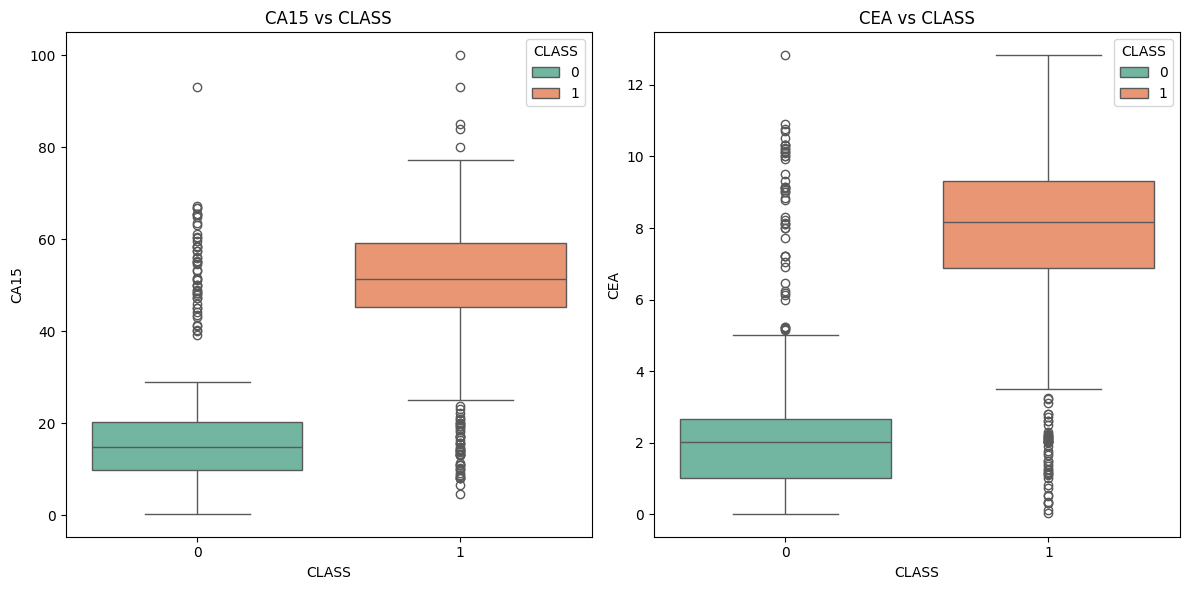

In [12]:
cancer_biomarkers = ['CA15', 'CEA']

plt.figure(figsize=(12, 6))
for i, biomarker in enumerate(cancer_biomarkers, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=data, x='CLASS', y=biomarker, palette="Set2", hue = "CLASS")
    plt.title(f'{biomarker} vs CLASS')
    plt.xlabel('CLASS')
    plt.ylabel(biomarker)
plt.tight_layout()
plt.show()

Both variables exhibit significantly higher values for $ \texttt{CLASS} = 1$, indicating strong discrimination between the groups.

## Correlation Matrix

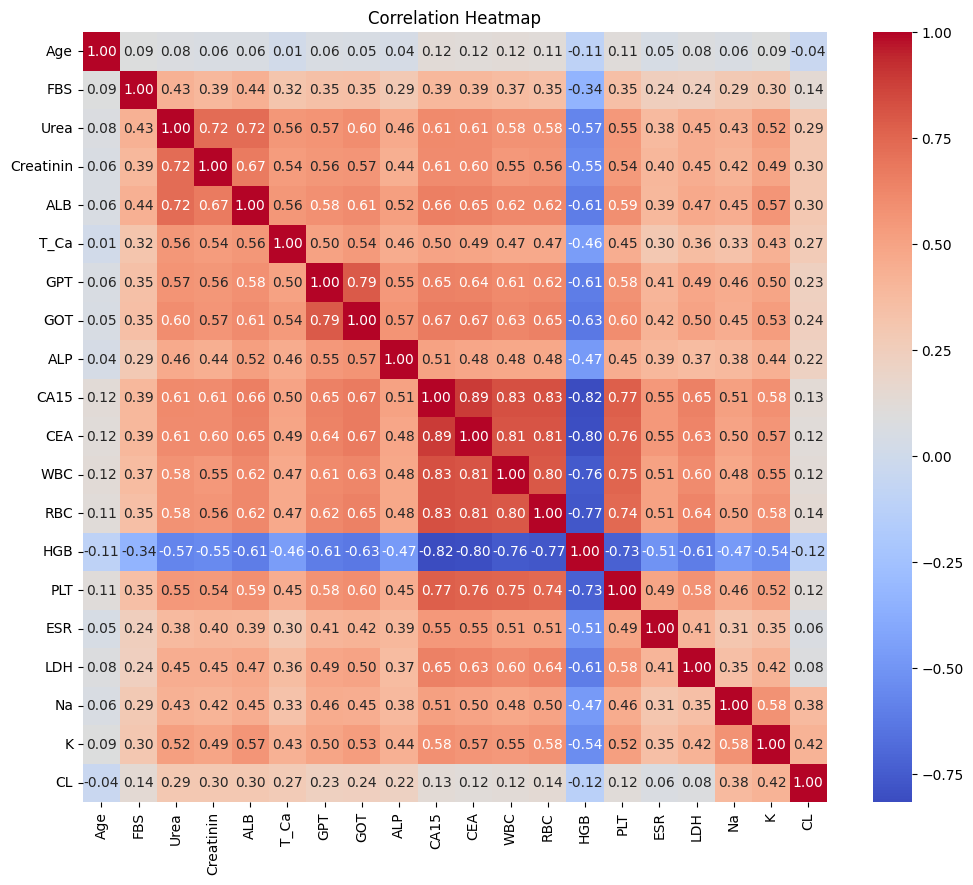

In [13]:
plt.figure(figsize=(12, 10))
correlation_matrix = data.drop(columns=['CLASS', 'Sex', 'Address']).corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

The reported correlation matrix provides great insights about the relationships between the numerical variables. We can already notice a clear cluster of high correlations around the middle section of the matrix. The highlights are:

- ⁠Strong positive correlations: the two biomarkers, unsurprisingly, show a very strong positive correlation with each other. This indicates that **CA15** and **CEA** might measure similar phenomena. **WBC** and **RBC** also have high positive correlation, which is expected as they are both often related blood parameters.
- ⁠Strong negative correlations: **HGB** (hemoglobin) exhibits strong negative correlations, especially with **PLT**, **WBC** and **RBC**. This is notable, since it may imply inverse relationships in cancer identification.
- ⁠Weak correlations: **Age** and **CL** have very low correlations with most variables, implying that these factors are not strongly age and chloride-dependent.

The high correlations observed between the two biomarkers raise the question of multicollinearity and whether these biomarkers should be analyzed together. In fact, **CA15** and **CEA** are two well-known biomarkers and [studies](https://pmc.ncbi.nlm.nih.gov/articles/PMC5022658/) have shown that biomarkers such as these are already established predictors of benign and malignant cancer. This poses the question of whether **CA15** and **CEA** are interesting variables to analyze, and to further address this question, we evaluate the Variance Inflation Factor (**VIF**) to assess their redundancy and ensure they provide unique and complementary diagnostic information.

## Variance Inflation Factor

In [14]:
pd.set_option("display.max_columns", None)

utils.get_vif(
  data,
  data.drop(columns='CLASS').columns
)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
Feature,const,Sex,Age,Address,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
VIF,669.26,1.02,1.04,1.04,1.33,2.93,2.55,2.93,1.76,3.02,3.35,1.72,7.00,6.13,4.07,4.23,3.68,3.05,1.53,1.90,1.77,2.20,1.46


**CA15** and **CEA** both show a **VIF** value above the alerting threshold of $VIF > 5$. For this reason and the studies mentioned above, we ultimately decided not to include them because we concluded that an analysis regarding models with these variables would not be of much interest.
More so, multicollinearity usually negatively affects the predictive power of the models by making it difficult to interpret the individual coefficients of the predictors.

We will now proceed with feature selection on the remaining variables.

---

# Feature selection

In order to evaluate the best model, we splitted the data in train, validation and test. In fact, our main goal was to perform K-Fold Cross Validation, which smooths the effects of random initialization and overfitting, ensuring robustness and reliability of the model. It also mitigates bias in data splits.

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree

from statsmodels.tools.tools import add_constant

In [16]:
X = data.drop(columns=['CLASS', 'CA15', 'CEA'])
y = data['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=10)

print(f"Train set size: {X_train.shape[0]}")
print(f"Validation set size: {X_valid.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Train set size: 1461
Validation set size: 487
Test set size: 487


## Feature Selection with Accuracy

We start our feature selection process by performing a forward selection using validation accuracy as the metric to evaluate the best performing variables. We assumed that a $1\%$ increase in accuracy would be significant enough.

In [17]:
acc_threshold = 0.01    # 1% improvement in accuracy
selected_features_accuracy = utils.accuracy_selection(X_train, y_train, acc_threshold)
print(f"Selected features based on accuracy: {selected_features_accuracy}")

Selected features based on accuracy: ['RBC']


Accuracy-based feature selection only yielded **RBC** (Red Blood Cells) as a sufficient feature.

## Feature Selection with AUC Score

In clinical tests, sensitivity and sepcificity indexes are considered important on evaluating the model's reliability, so we decided to do feature selection based on the AUC value, which intrinsically explains both of them. 

We decided that a variable would have to be taken into account if it brought a 5% gain to the overall AUC.

In [18]:
auc_threshold = 0.05    # 5% improvement in AUC score
selected_features_auc = utils.auc_selection(X_train, y_train, auc_threshold)
print(f"Selected features based on auc: {selected_features_auc}")


Selected features based on auc: ['RBC']


AUC-based feature selection only yielded **RBC** (Red Blood Cells) as a sufficient feature.

## Feature Selection with Random Forest

Lastly, we tried another approach by employing Random Forest not as a classifier, but for feature selection only. 

To overcome the non-deterministic initialization of Random Forest, we decided to average the performance across 100 runs, where *max_depth* was chosen by testing between 10 values (1-10).

In [19]:
%%capture
importances_over_iterations = {column: [] for column in X.columns}


for _ in tqdm(range(100)):
    
    rf_model = RandomForestClassifier(max_depth=6, random_state=None)
    rf_model.fit(X_train, y_train)

    y_pred_rf = rf_model.predict(X_valid)
    accuracy_rf = accuracy_score(y_valid, y_pred_rf)
    conf_matrix_rf = confusion_matrix(y_valid, y_pred_rf)

    importances = rf_model.feature_importances_
    for feature, importance in zip(X.columns, importances):
        importances_over_iterations[feature].append(importance)

average_importances = {feature: np.mean(importances) for feature, importances in importances_over_iterations.items()}
std_importances = {feature: np.std(importances) for feature, importances in importances_over_iterations.items()}

importance_df = pd.DataFrame({
    'Importance': average_importances,
    'StdDev': std_importances
}).sort_values(by='Importance', ascending=False)

print("Aggregated Feature Importances over 100 iterations:")
print(importance_df)
selected_features_rf = importance_df[:4].index.to_list()

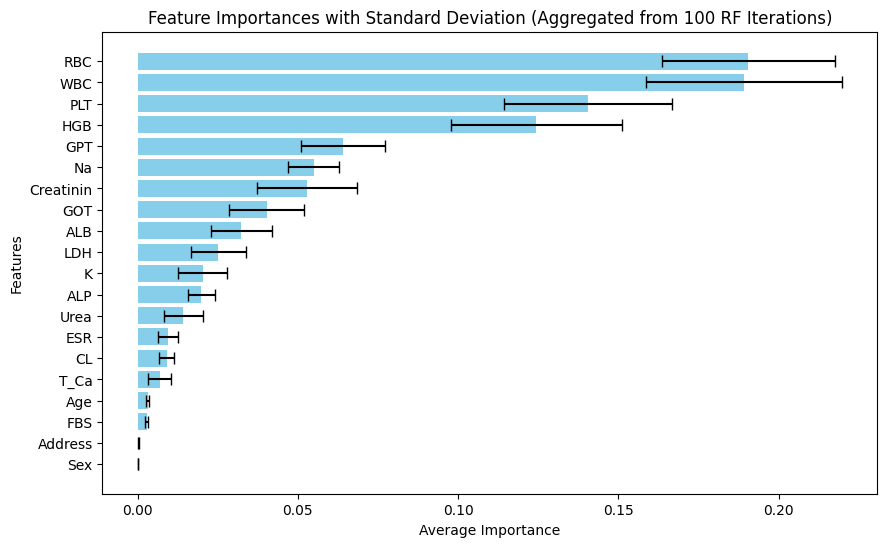

In [20]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df.index, importance_df['Importance'], xerr=importance_df['StdDev'], capsize=4, color='skyblue')
plt.xlabel('Average Importance')
plt.ylabel('Features')
plt.title('Feature Importances with Standard Deviation (Aggregated from 100 RF Iterations)')
plt.gca().invert_yaxis()
plt.show()

As we can see from the output, Random Forest highlighted four main variables: **RBC**, **WBC** (White Blood Cells), **PLT** (Platelet Count), **HGB** (Hemoglobin).

# Logistic Regression

Since Accuracy and AUC-based methods yielded the same results, we will now proceed to compare two distinct Logistic Regression models built using the variables obtained from the three feature selection processes. 

## Logistic Regression from Accuracy/AUC-based feature selection

In [21]:
%%capture
X = data.drop(columns=['CLASS', 'CA15', 'CEA'])
y = data['CLASS']

thresholds, sensitivity, specificity, accuracy, aic, bic, df = utils.threshold_estimation(X, y, selected_features_accuracy)
sensitivity_mean = sensitivity["mean"]
specificity_mean = specificity["mean"]
accuracy_mean = accuracy["mean"]
sums = []
for i, threshold in enumerate(thresholds):
    sums.append(0.4 * sensitivity_mean[i] + 0.4 * specificity_mean[i] + 0.2 * accuracy_mean[i])

best_threshold_index = np.argmax(sums)


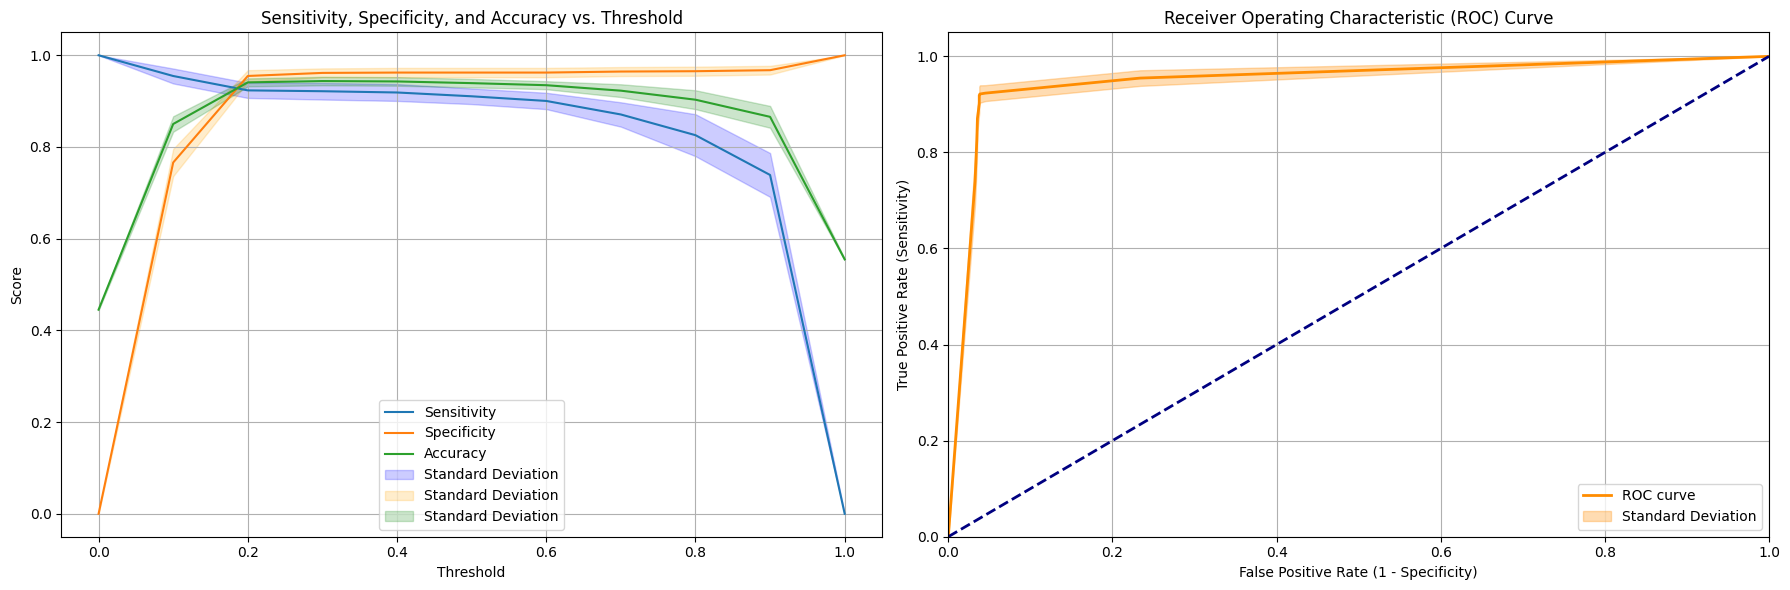

Best Threshold Index: 3, with value: 0.9419852419732917
AIC: 1040.4201104019783
BIC: 1051.8047933896416


In [22]:
utils.thresholds_plotter(thresholds, sensitivity, specificity, accuracy)
print(f'Best Threshold Index: {best_threshold_index}, with value: {sums[best_threshold_index]}')
print(f'AIC: {aic.mean()}')
print(f'BIC: {bic.mean()}')

In [23]:
%%capture
X = data.drop(columns=['CLASS', 'CA15', 'CEA'])
y = data['CLASS']

thresholds, sensitivity, specificity, accuracy, aic, bic, df = utils.threshold_estimation(X, y, selected_features_auc)
utils.thresholds_plotter(thresholds, sensitivity, specificity, accuracy)

sensitivity_mean = sensitivity["mean"]
specificity_mean = specificity["mean"]
accuracy_mean = accuracy["mean"]
sums = []
for i, threshold in enumerate(thresholds):
    sums.append(0.4 * sensitivity_mean[i] + 0.4 * specificity_mean[i] + 0.2 * accuracy_mean[i])

best_threshold_index = np.argmax(sums)
print(f'Best Threshold Index: {best_threshold_index}, with value: {sums[best_threshold_index]}')
print(f'AIC: {aic.mean()}')
print(f'BIC: {bic.mean()}')

## Logistic Regression from Random Forest-based feature selection

In [24]:
%%capture
X = data.drop(columns=['CLASS', 'CA15', 'CEA'])
y = data['CLASS']

thresholds_rf, sensitivity_rf, specificity_rf, accuracy_rf, aic_rf, bic_rf, df_rf = utils.threshold_estimation(X, y, selected_features_rf)

sensitivity_mean = sensitivity_rf["mean"]
specificity_mean = specificity_rf["mean"]
accuracy_mean = accuracy_rf["mean"]
sums = []
for i, threshold in enumerate(thresholds_rf):
    sums.append(0.4 * sensitivity_mean[i] + 0.4 * specificity_mean[i] + 0.2 * accuracy_mean[i])
best_rf_threshold_index = np.argmax(sums)

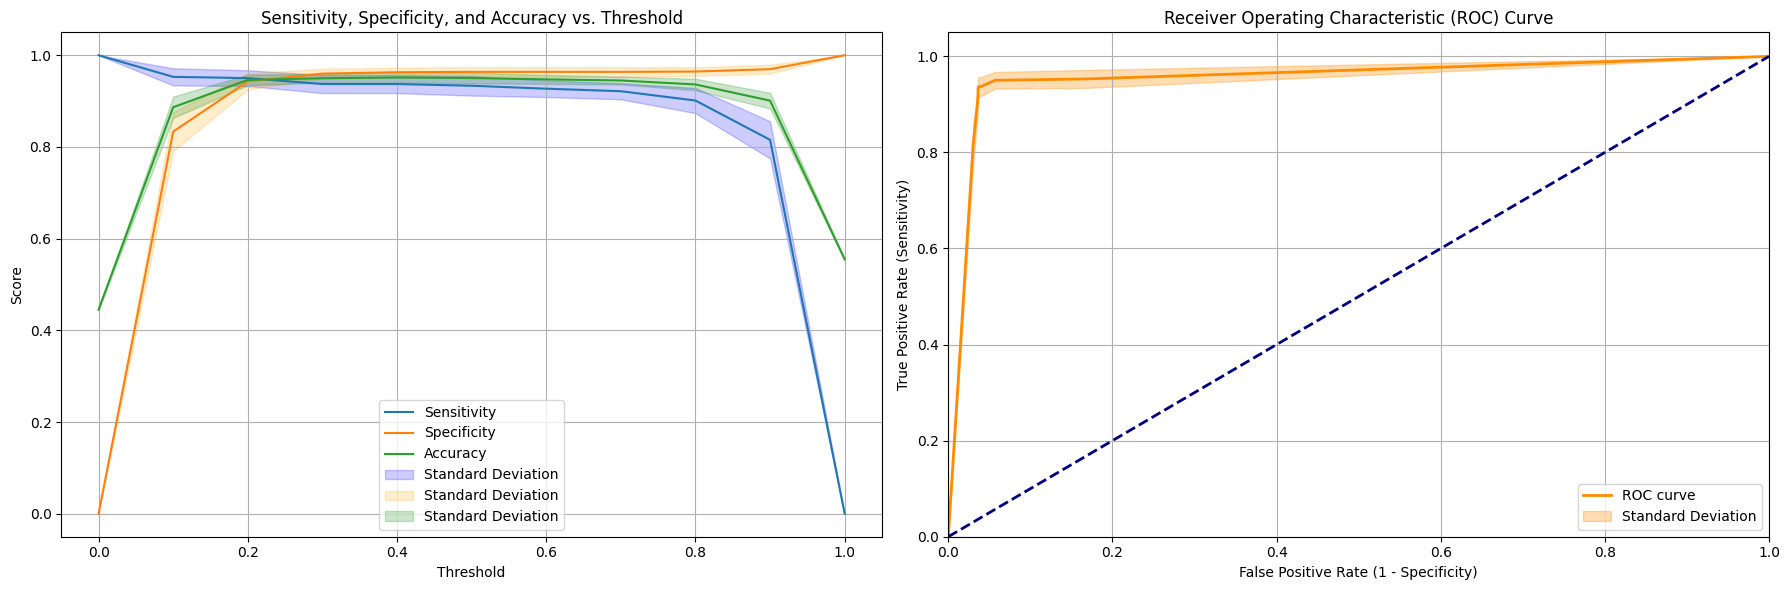

Best Threshold Index: 4, with value: 0.9504005648010074
AIC: 886.6346726689019
BIC: 915.0963801380603


In [25]:
utils.thresholds_plotter(thresholds_rf, sensitivity_rf, specificity_rf, accuracy_rf)
print(f'Best Threshold Index: {best_rf_threshold_index}, with value: {sums[best_rf_threshold_index]}')
print(f'AIC: {aic_rf.mean()}')
print(f'BIC: {bic_rf.mean()}')

In [26]:
print(f'Best sensitivity of the best model: {sensitivity_mean[best_threshold_index]}\nBest specificity of the best model: {specificity_mean[best_threshold_index]}\nBest accuracy of the best model: {accuracy_mean[best_threshold_index]}')

Best sensitivity of the best model: 0.9372409106354059
Best specificity of the best model: 0.9600326797385621
Best accuracy of the best model: 0.9498886865007083


In [27]:
best_log_model_info = {
  'threshold': thresholds[best_rf_threshold_index], 
  "accuracy": {
    'mean': accuracy_rf['mean'][best_rf_threshold_index],
    'std': accuracy_rf['std'][best_rf_threshold_index]
  },
  "sensitivity": {
    'mean': sensitivity_rf['mean'][best_rf_threshold_index],
    'std': sensitivity_rf['std'][best_rf_threshold_index]
  },
  "specificity": {
    'mean': specificity_rf['mean'][best_rf_threshold_index],
    'std': specificity_rf['std'][best_rf_threshold_index]
  },
}

## Logistic Regression Results

In order to select which is the best model, we performed a weighted sum over the following metrics: *Accuracy*, *Sensitivity* and *Specificity*. We chose to give more weight to the latter two since in the context of medical analysis *Sensitivity* and *Specificity* help medical personnel understand how reliable a test is in identifying a disease or condition.

Between the two models analyzed above, the one based on Random Forest feature selection is the one that performed the best. Even though this model is definetely more complex, by having four variables instead of just one as in the other model, it still achieved the lowest AIC and BIC values, making a great performer overall. Moreover, it achieved the highest performance across all analyzed metrics.

---

# GAM

In [28]:
%%capture
%load_ext rpy2.ipython

In [29]:
%%capture
%%R
library(mgcv)

In [30]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module='rpy2.robjects.pandas2ri')

We took the best model found through our analysis of the logistic regression models (based on Random Forest-Feature Selection) and we continued our analysis by building a GAM upon it.

Usually, the choice of applying a spline on a variable is dependant on the lambda coefficient, the estimated degrees of freedom and the relative smooth effect plots. They are pretty sensible to variations of the dataset, which can be seen from the plots below.

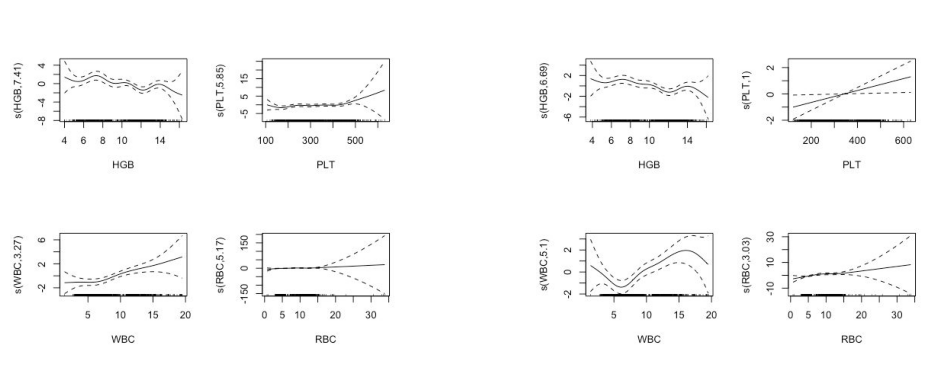

In [31]:
import matplotlib.image as mpimg

img1 = mpimg.imread('./img/splineR-1.jpeg')
img2 = mpimg.imread('./img/splineR-2.jpeg')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.subplots_adjust(wspace=0.3)

axes[0].imshow(img1)
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].axis('off')

plt.show()

For this reason, we decided to apply a process of cross-validation to make the best choice.

## Cross-validation for estimating spline metrics


In [32]:
from sklearn.model_selection import StratifiedKFold

def gam_cross_val(X, y, selected_features, with_PLT = True, use_glm=False):

  kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

  s_array = []
  degree_of_freedom_array = []
  aic_array = []
  total_df_array = []

  for train_index, test_index in tqdm(kf.split(X[selected_features], y)):
      X_train, X_test = X[selected_features].iloc[train_index], X[selected_features].iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      X_train = sm.add_constant(X_train)
      X_test = sm.add_constant(X_test)

      train_data = pd.concat([X_train, y_train], axis = 1)
      %Rpush train_data
      

      if use_glm:
        %R gamfit <- glm(CLASS ~ HGB + PLT + WBC + RBC, data = train_data, family = binomial)
      elif with_PLT:
        %R gamfit <- gam(CLASS ~ s(HGB) + s(PLT) + s(WBC) + s(RBC), data = train_data, family = binomial)
        pass
      else:
        %R gamfit <- gam(CLASS ~ s(HGB) + PLT + s(WBC) + s(RBC), data = train_data, family = binomial)
        pass
      
      # DF
      %R summ <- summary(gamfit)
      %R edf <- summ$s.table[, "edf"]
      %R edf_list <- as.list(edf)
      
      %Rpull edf_list
      
      if not use_glm:
        edf_dict = {str(edf_list.names[i]): edf_list[i][0] for i in range(len(edf_list))}
        edf_dict = list(edf_dict.values())
      
        degree_of_freedom_array.append(edf_dict)
      
      # AIC
      %R -o aic aic=AIC(gamfit)
      aic_array.append(aic[0])
      
      #s (spline)
      if not use_glm:
        %R -o spline spline=round(gamfit$sp, 4)
        s_array.append(spline)
        
      # Total DF
      %R -o t_df t_df=sum(influence(gamfit))
      total_df_array.append(t_df[0])
      
  degree_of_freedom_array = np.array(degree_of_freedom_array)
  s_array = np.array(s_array)
  aic_array = np.array(aic_array)
  total_df_array = np.array(total_df_array)

  df_mean = np.mean(degree_of_freedom_array, axis=0)
  df_std = np.std(degree_of_freedom_array, axis=0)
  
  aic_mean = np.mean(aic_array)
  aic_std = np.std(aic_array)

  s_mean = np.mean(s_array, axis=0)
  s_std = np.std(s_array, axis=0)
  
  total_df_mean = total_df_array.mean()
  total_df_std = total_df_array.std()

  df = {
    "mean": df_mean,
    "std": df_std
  }
  
  AIC = {
    "mean": aic_mean,
    "std": aic_std
  }
  
  s = {
    "mean": s_mean,
    "std": s_std
  }
  
  total_df = {
    "mean": total_df_mean,
    "std": total_df_std
  }

  return df, AIC, s, total_df

In [33]:
%%capture
df_gam, AIC_gam, s_gam, total_df_gam = gam_cross_val(X, y, selected_features_rf)

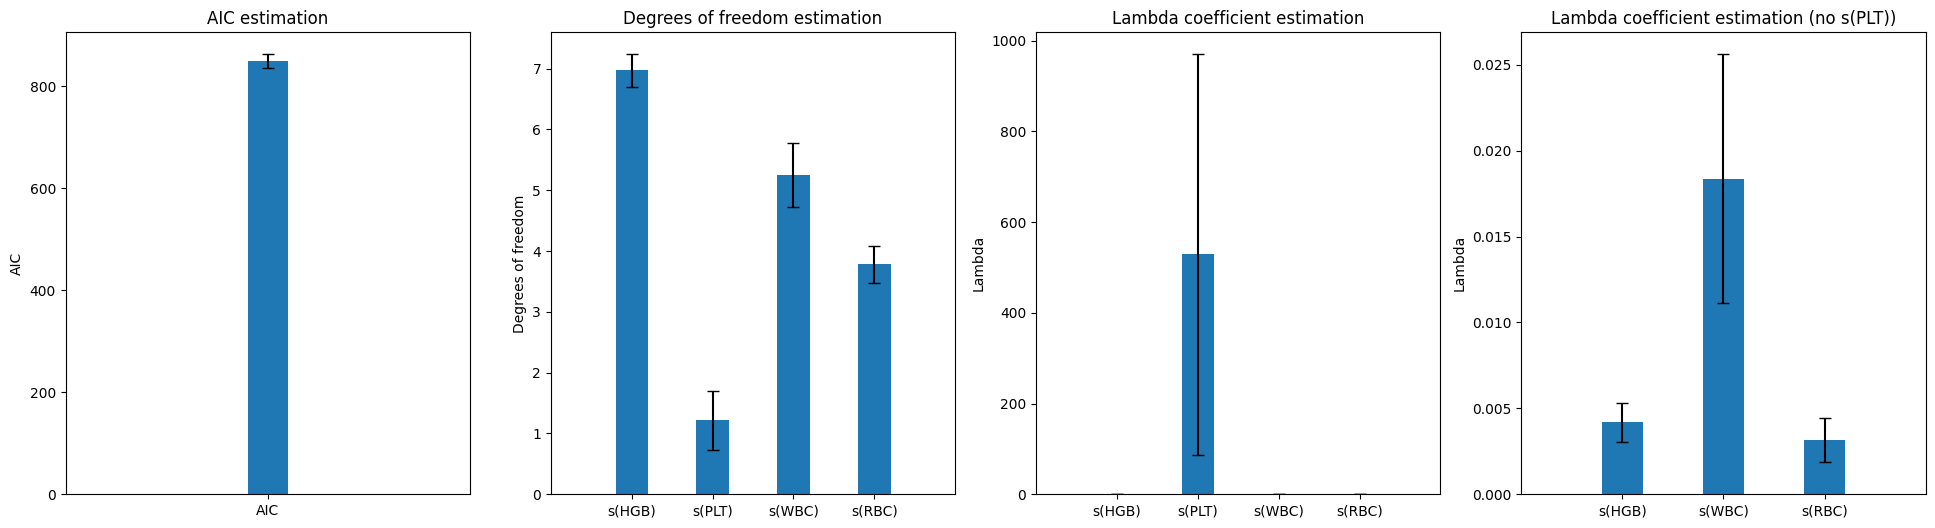

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24, 6))

axes[0].set_title("AIC estimation")
axes[0].set_ylabel("AIC")
axes[0].bar([1], AIC_gam['mean'], yerr=AIC_gam['std'], capsize=4, width=0.4)
axes[0].set_xlim(-1,3)
axes[0].set_xticks(ticks=[1], labels=['AIC'])

axes[1].set_title("Degrees of freedom estimation")
axes[1].set_ylabel("Degrees of freedom")
axes[1].bar([1,2,3,4], df_gam['mean'], yerr=df_gam['std'], capsize=4, width=0.4)
axes[1].set_xlim(0,5)
axes[1].set_xticks(ticks=[1,2,3,4], labels=['s(HGB)', 's(PLT)', 's(WBC)', 's(RBC)'])

axes[2].set_title("Lambda coefficient estimation")
axes[2].set_ylabel("Lambda")
axes[2].bar([1,2,3,4], s_gam['mean'], yerr=s_gam['std'], capsize=4, width=0.4)
axes[2].set_xlim(0,5)
axes[2].set_xticks(ticks=[1,2,3,4], labels=['s(HGB)', 's(PLT)', 's(WBC)', 's(RBC)'])

axes[3].set_title("Lambda coefficient estimation (no s(PLT))")
axes[3].set_ylabel("Lambda")
axes[3].bar([1,2,3], s_gam['mean'][[0,2,3]], yerr=s_gam['std'][[0,2,3]], capsize=4, width=0.4)
axes[3].set_xlim(0,4)
axes[3].set_xticks(ticks=[1,2,3], labels=['s(HGB)', 's(WBC)', 's(RBC)'])

plt.show()

As we could understand from previous plots, **PLT** has a very sensible lambda value. Moreover, it is the variable with the lowest degree of freedom, around 1, so we can confidently say that its effects are linear.

In [35]:
%%capture
df_no_PLT, AIC_no_PLT, s_no_PLT, total_df_no_PLT = gam_cross_val(X, y, selected_features_rf, with_PLT=False)

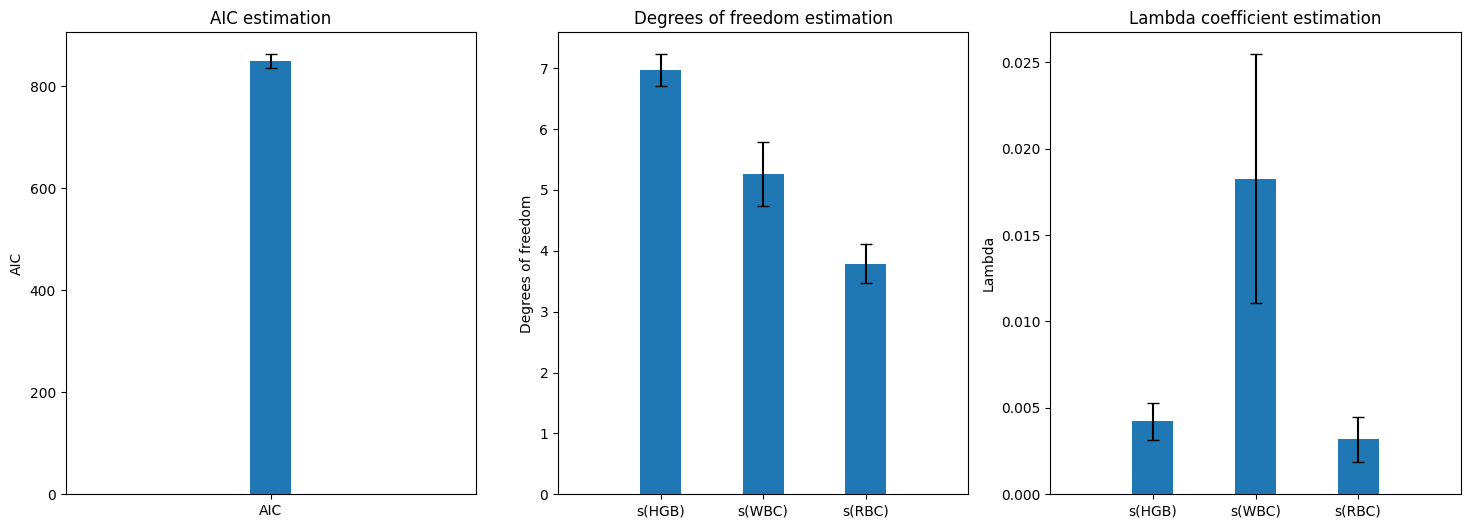

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

axes[0].set_title("AIC estimation")
axes[0].set_ylabel("AIC")
axes[0].bar([1], AIC_no_PLT['mean'], yerr=AIC_no_PLT['std'], capsize=4, width=0.4)
axes[0].set_xlim(-1,3)
axes[0].set_xticks(ticks=[1], labels=['AIC'])

axes[1].set_title("Degrees of freedom estimation")
axes[1].set_ylabel("Degrees of freedom")
axes[1].bar([1,2,3], df_no_PLT['mean'], yerr=df_no_PLT['std'], capsize=4, width=0.4)
axes[1].set_xlim(0,4)
axes[1].set_xticks(ticks=[1,2,3], labels=['s(HGB)', 's(WBC)', 's(RBC)'])

axes[2].set_title("Lambda coefficient estimation")
axes[2].set_ylabel("Lambda")
axes[2].bar([1,2,3], s_no_PLT['mean'], yerr=s_no_PLT['std'], capsize=4, width=0.4)
axes[2].set_xlim(0,4)
axes[2].set_xticks(ticks=[1,2,3], labels=['s(HGB)', 's(WBC)', 's(RBC)'])

plt.show()

Given the lambda values and the degrees of freedom, we can conclude that the variables **HGB**, **WBC** and **RBC** turn out to be more efficient in predicting the outcome if modeled with a spline.

## Comparison between models

We compare the two GAM models analyzed above with the best logistic model found before. First, we can see that the new GAM models have a smaller AIC overall. 

Furthermore, since the degrees of freedom of the GAM model without the spline on **PLT** are slightly lower compared to model with splines on every variable, and given the fact that the AIC of both models is nearly the same, we decided to consider the model without the spline on **PLT** as the best between the two.

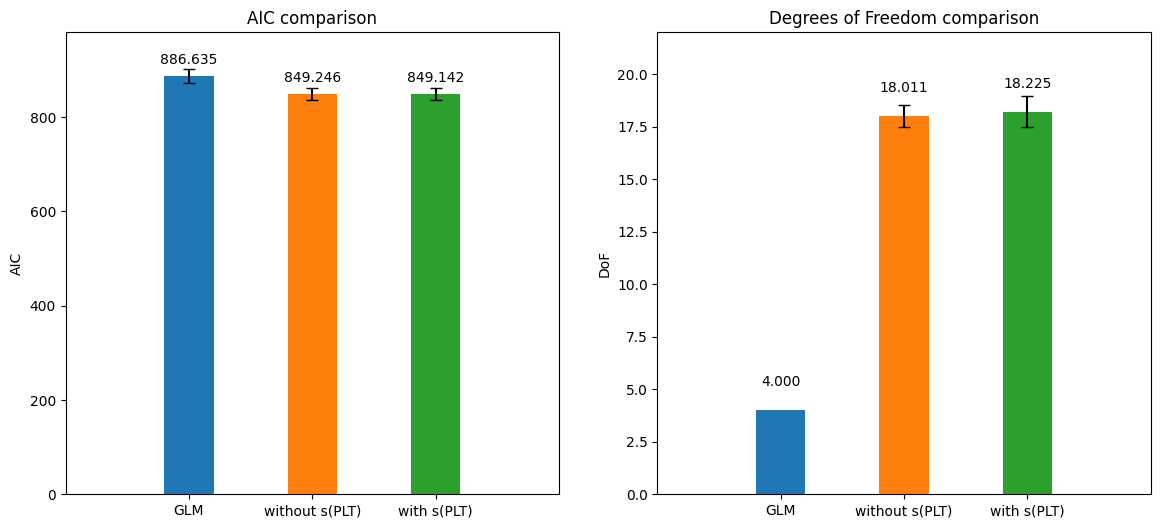

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].set_title("AIC comparison")
axes[0].set_ylabel("AIC")
bar3 = axes[0].bar([1], aic_rf.mean(), yerr=aic_rf.std(), capsize=4, width=0.4)
bar2 = axes[0].bar([2], AIC_no_PLT['mean'], yerr=AIC_no_PLT['std'], capsize=4, width=0.4)
bar1 = axes[0].bar([3], AIC_gam['mean'], yerr=AIC_gam['std'], capsize=4, width=0.4)
axes[0].set_xlim(0, 4)
axes[0].set_ylim(0, 980)
axes[0].set_xticks([1, 2, 3])
axes[0].set_xticklabels(['GLM', 'without s(PLT)', 'with s(PLT)'])

for rect in bar1 + bar2 + bar3:
    height = rect.get_height()
    axes[0].text(rect.get_x() + rect.get_width() / 2.0, height + 20, f'{height:.3f}', ha='center', va='bottom')

axes[1].set_title("Degrees of Freedom comparison")
axes[1].set_ylabel("DoF")
bar3 = axes[1].bar([1], df_rf.mean(), capsize=4, width=0.4)
bar2 = axes[1].bar([2], total_df_no_PLT['mean'], yerr=total_df_no_PLT['std'], capsize=4, width=0.4)
bar1 = axes[1].bar([3], total_df_gam['mean'], yerr=total_df_gam['std'], capsize=4, width=0.4)
axes[1].set_xlim(0, 4)
axes[1].set_ylim(0, 22)
axes[1].set_xticks([1, 2, 3])
axes[1].set_xticklabels(['GLM', 'without s(PLT)', 'with s(PLT)'])

for rect in bar1 + bar2 + bar3:
    height = rect.get_height()
    axes[1].text(rect.get_x() + rect.get_width() / 2.0, height + 1, f'{height:.3f}', ha='center', va='bottom')

plt.show()

In [38]:
def gam_threshold_estimation(X, y):
  
  thresholds = np.arange(0.0, 1.1, 0.1)
  kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
  
  accuracy_array = []
  sensitivity_array = []
  specificity_array = []
  
  for train_index, test_index in tqdm(kf.split(X, y)):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      X_train = sm.add_constant(X_train)
      X_test = sm.add_constant(X_test)

      train_data = pd.concat([X_train, y_train], axis = 1)
      %Rpush train_data
      %Rpush X_test
      
      for threshold in thresholds:
        %Rpush threshold
        %R model <- gam(CLASS ~ s(HGB) + PLT + s(WBC) + s(RBC), data = train_data, family = binomial)
        %R y_pred <- ifelse(predict(model, X_test, type = "response") >= threshold, 1, 0)
        %R -o y_pred
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_array.append(accuracy)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity_array.append(sensitivity)
        specificity_array.append(specificity)
        
  accuracy_array = np.array(accuracy_array).reshape(-1, thresholds.shape[0])
  sensitivity_array = np.array(sensitivity_array).reshape(-1, thresholds.shape[0])
  specificity_array = np.array(specificity_array).reshape(-1, thresholds.shape[0])

  cv_info = {
    "accuracy" : {
      'mean': np.mean(accuracy_array, axis=0),
      'std': np.std(accuracy_array, axis=0),
    },
    "sensitivity" : {
      'mean': np.mean(sensitivity_array, axis=0),
      'std': np.std(sensitivity_array, axis=0),
    },
    "specificity" : {
      'mean': np.mean(specificity_array, axis=0),
      'std': np.std(specificity_array, axis=0),
    }
  }
  
  performance_index:np.array = 0.2*cv_info['accuracy']['mean'] + 0.4*cv_info['sensitivity']['mean'] + 0.4*cv_info['specificity']['mean']
  best_performance_index = performance_index.argmax()
  best_model_info = {
    'threshold': thresholds[best_performance_index],
    'accuracy': {
      'mean': cv_info['accuracy']['mean'][best_performance_index],
      'std': cv_info['accuracy']['std'][best_performance_index],
    },
    'sensitivity': {
      'mean': cv_info['sensitivity']['mean'][best_performance_index],
      'std': cv_info['sensitivity']['std'][best_performance_index],
    },
    'specificity': {
      'mean': cv_info['specificity']['mean'][best_performance_index],
      'std': cv_info['specificity']['std'][best_performance_index],
    },
  }
  
  return cv_info, best_model_info

In [39]:
%%capture
cv_info, best_gam_model_info = gam_threshold_estimation(X,y)

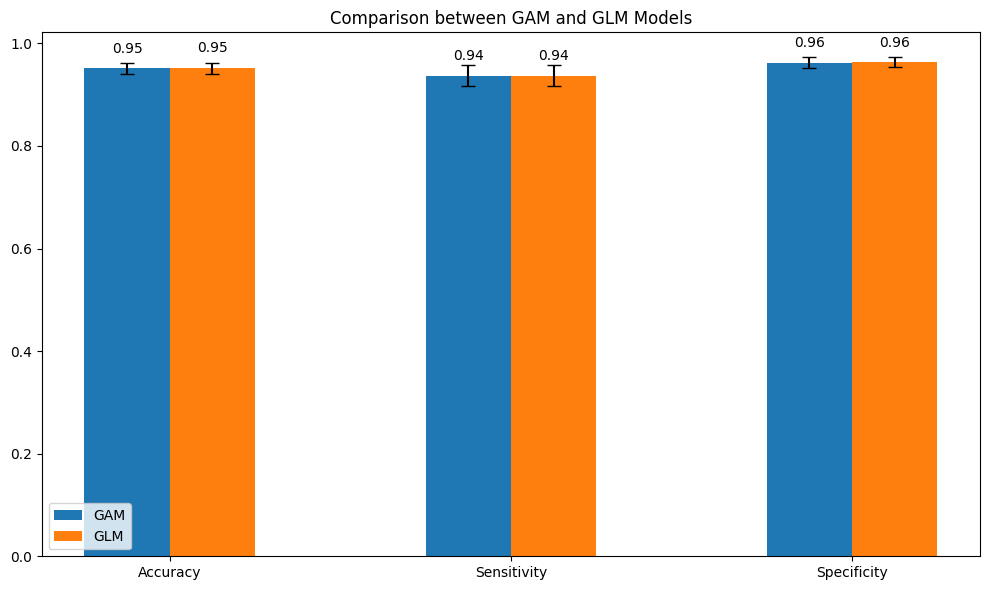

In [40]:
import matplotlib.pyplot as plt

gam_mean = [best_gam_model_info['accuracy']['mean'], best_gam_model_info['sensitivity']['mean'], best_gam_model_info['specificity']['mean']]
glm_mean = [best_log_model_info['accuracy']['mean'], best_log_model_info['sensitivity']['mean'], best_log_model_info['specificity']['mean']]
gam_std = [best_gam_model_info['accuracy']['std'], best_gam_model_info['sensitivity']['std'], best_gam_model_info['specificity']['std']]
glm_std = [best_log_model_info['accuracy']['std'], best_log_model_info['sensitivity']['std'], best_log_model_info['specificity']['std']]

x_axis_labels = ['Accuracy', 'Sensitivity', 'Specificity']
x_axis_tick = np.array([1, 1.2, 1.4])

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.05

ax.bar(x_axis_tick - bar_width/2, gam_mean, bar_width, yerr=gam_std, label='GAM', capsize=5)
ax.bar(x_axis_tick + bar_width/2, glm_mean, bar_width, yerr=glm_std, label='GLM', capsize=5)

ax.set_title('Comparison between GAM and GLM Models')
ax.set_xticks(x_axis_tick)
ax.set_xticklabels(x_axis_labels)
ax.legend()

for i, v in enumerate(gam_mean):
  ax.text(x_axis_tick[i] - bar_width/2, v + 0.025, f'{v:.2f}', ha='center', va='bottom')

for i, v in enumerate(glm_mean):
  ax.text(x_axis_tick[i] + bar_width/2, v + 0.025, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()

Comparing the logistic regression with the best model obtained implementing the splines, we noticed that there is no difference in terms of performance. Given the Occam's Razor principle, we can state that there is no need to improve the complexity of the model: the best one is also the simplest one.

Finally, we concluded by analyzing the generalization performance of the logistic regression model.

In [41]:
X_train_const = sm.add_constant(X_train[selected_features_rf])
X_test_const = sm.add_constant(X_test[selected_features_rf])
best_model = sm.Logit(y_train, X_train_const).fit(disp=0)

y_train_pred_prob = best_model.predict(X_train_const)
y_train_pred = y_train_pred_prob > best_log_model_info['threshold']

train_accuracy = accuracy_score(y_train, y_train_pred)
train_tn, train_fp, train_fn, train_tp = confusion_matrix(y_train, y_train_pred).ravel()
train_sensitivity = train_tp / (train_tp + train_fn) if (train_tp + train_fn) > 0 else 0
train_specificity = train_tn / (train_tn + train_fp) if (train_tn + train_fp) > 0 else 0

y_test_pred_prob = best_model.predict(X_test_const)
y_test_pred = y_test_pred_prob > best_log_model_info['threshold']

test_accuracy = accuracy_score(y_test, y_test_pred)
test_tn, test_fp, test_fn, test_tp = confusion_matrix(y_test, y_test_pred).ravel()
test_sensitivity = test_tp / (test_tp + test_fn) if (test_tp + test_fn) > 0 else 0
test_specificity = test_tn / (test_tn + test_fp) if (test_tn + test_fp) > 0 else 0

results_logistic_regression = pd.DataFrame({
  'Accuracy': [train_accuracy, test_accuracy],
  'Sensitivity': [train_sensitivity, test_sensitivity],
  'Specificity': [train_specificity, test_specificity]
}, index=['Train', 'Test'])

results_logistic_regression

,Accuracy,Sensitivity,Specificity
Train,0.952772,0.939850,0.963568
Test,0.944559,0.933649,0.952899


The test metrics and train metrics are nearly the same. This fact emphasizes the good generalization ability of the model.

---

# Decision Tree Classification

We decided to train a Decision Tree Classifier to have an overview on how different models perform on this specific task. Moreover, Decision Trees are widely used in clinical environments because of their explainability qualities.

Given the well-known dependency of Decision Trees on the random state, we ran 100 simulations to determine the optimal tree depth to achieve a reasonable bias-variance tradeoff.


Here are the results obtained with such depth on the test set:

In [42]:
%%capture
accuracies_rf = [[] for _ in range(10)]
sensitivities_rf = [[] for _ in range(10)]
specificities_rf = [[] for _ in range(10)]

for _ in tqdm(range(100)):

    for i in range(1, 11):
        rf_model = DecisionTreeClassifier(max_depth=i, random_state=None)
        rf_model.fit(X_train, y_train)

        y_pred_rf = rf_model.predict(X_valid)

        accuracy_rf = accuracy_score(y_valid, y_pred_rf)
        accuracies_rf[i-1].append(accuracy_rf)

        tn, fp, fn, tp = confusion_matrix(y_valid, y_pred_rf).ravel()  
        sensitivity_rf = tp / (tp + fn) if (tp + fn) > 0 else 0 
        specificity_rf = tn / (tn + fp) if (tn + fp) > 0 else 0  

        sensitivities_rf[i-1].append(sensitivity_rf)
        specificities_rf[i-1].append(specificity_rf)

accuracies_rf = np.array(accuracies_rf)
sensitivities_rf = np.array(sensitivities_rf)
specificities_rf = np.array(specificities_rf)

accuracy_averages = np.mean(accuracies_rf, axis=1)
sensitivity_averages = np.mean(sensitivities_rf, axis=1)
specificity_averages = np.mean(specificities_rf, axis=1)


In [43]:
best_depth = np.argmax(accuracy_averages*0.2 + sensitivity_averages*0.4 + specificity_averages*0.4) + 1
print(f"Best depth: {best_depth}")

Best depth: 3


From these results we can see that the best choice is $\ \texttt{max depth} = 3$.


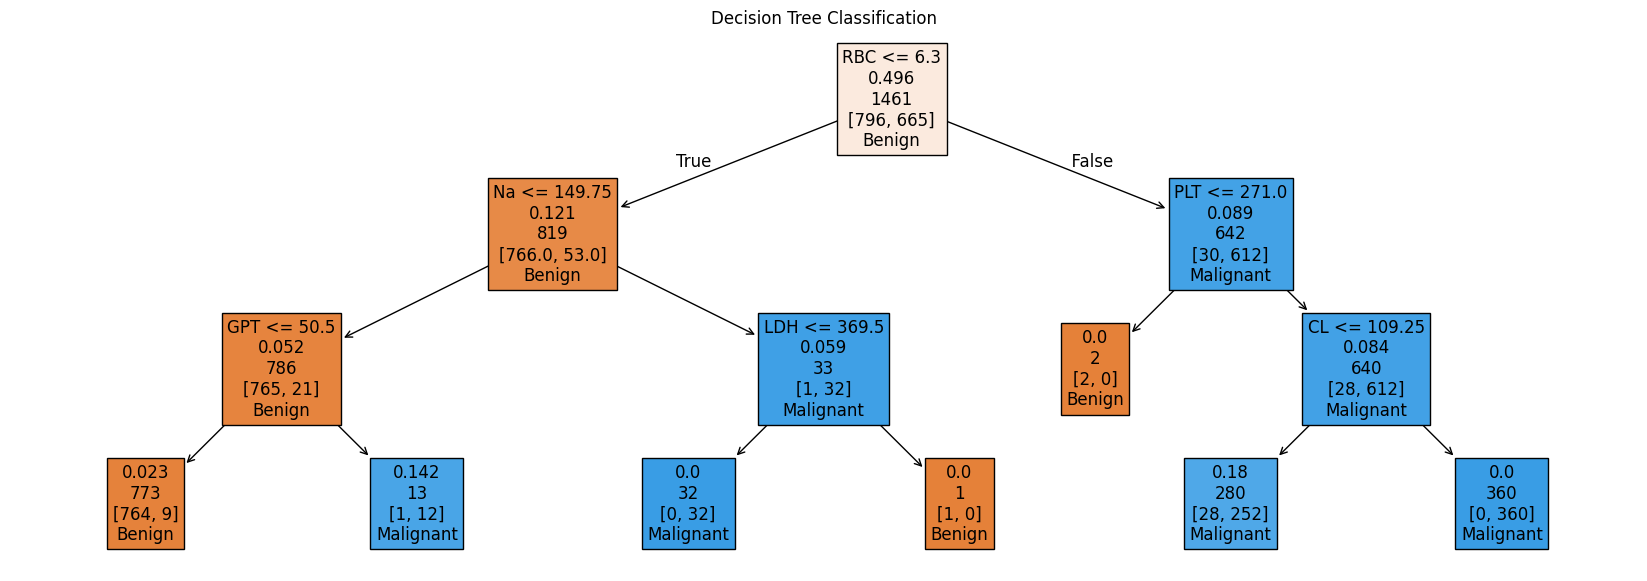

In [44]:
dt_model = DecisionTreeClassifier(max_depth=best_depth, random_state=None)
dt_model.fit(X_train, y_train)

y_pred_rfc = dt_model.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)

conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
tn, fp, fn, tp = conf_matrix_rfc.ravel()
sensitivity_rfc = tp / (tp + fn) if (tp + fn) > 0 else 0  
specificity_rfc = tn / (tn + fp) if (tn + fp) > 0 else 0  

plt.figure(figsize=(21, 7))
plot_tree(dt_model, 
          filled=True, 
          feature_names=X.columns, 
          class_names=['Benign', 'Malignant'],  
          label='none',  
          impurity=True,  
          proportion=False,  
          node_ids=False, 
          fontsize=12)
plt.title("Decision Tree Classification")
plt.show()

In [45]:
print("\n\n")

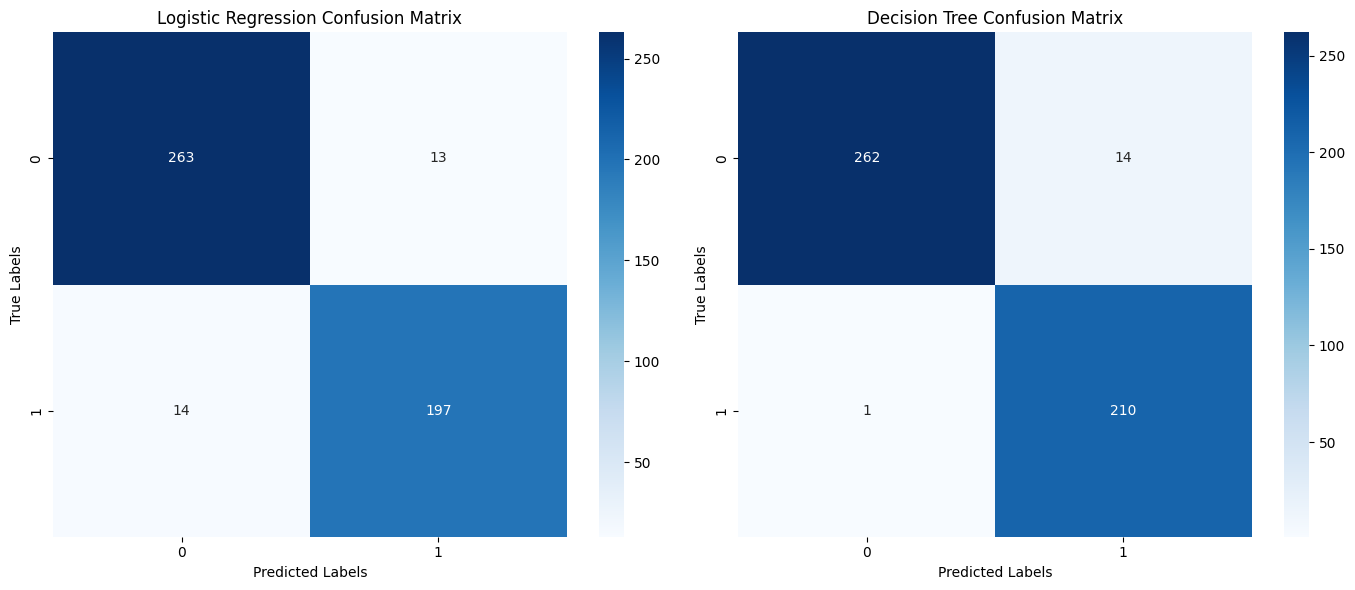

In [46]:

pd.set_option('display.precision', 10)
result_decision_tree = pd.DataFrame(
  {
    'Accuracy': [accuracy_rfc, results_logistic_regression.loc['Test']['Accuracy']],
    'Sensitivity': [sensitivity_rfc, results_logistic_regression.loc['Test']['Sensitivity']],
    'Specificity': [specificity_rfc, results_logistic_regression.loc['Test']['Specificity']],
  },
  index=["Decision Tree Classifier", "Best Logistic Regression"]
)

conf_matrix_logistic = confusion_matrix(y_test, y_test_pred)

conf_matrix_tree = confusion_matrix(y_test, y_pred_rfc)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

In [47]:
print("\n\n")
result_decision_tree

,Accuracy,Sensitivity,Specificity
Decision Tree Classifier,0.9691991786,0.9952606635,0.9492753623
Best Logistic Regression,0.9445585216,0.9336492891,0.9528985507


Compared to the best logistic regression model, this Decision Tree Classifier achieves a higher accuracy, with a score of $96.9\%$ compared to $94.4\%$ of the Logistic model. Moreover, in both sensitivity and specificity it achieves better perfomance, reaching $.995$ and $.949$ respectively.

# Conclusions

Our analysis has identified features beyond the classical biomarkers that perform equally well in predicting cancer presence, opening the possibility of approaching the detection of benign or malignant cancer from a different perspective compared to the traditional reliance on biomarkers.

Moreover, we identified two models, a logistic regression and a decision tree, that achieved highly satisfactory results, with accuracy, sensitivity, and specificity values exceeding 95%. These findings demonstrate the robustness of our models and their potential to support reliable malignant cancer diagnosis.